# Demo for LumiSpy package working with AttoLight SEM CL data

This notebook shows:

- Loading a `HYPCard.sur` file correctly with the lumispy load function
- Plotting cathodoluminescence data in different ways
- Dealing with metadata
- Correcting for spectral defects

**Note for M&M 2022**: This notebook was copied from a the LumiSpy demo repostitory and only minor changes were made to ensure it runs with the current Hyperspy-bundle installation. The original copy can be found at https://github.com/LumiSpy/lumispy-demos

- Joshua Taillon, July 25, 2022

Import packages:

In [1]:
%matplotlib notebook
# Use '%matplotlib widget' in JupterLab and '%matplotlib notebook' in JupyterNotebook for interactive inline functionality (e.g. on binder)
#For pop-up window plots on your local computer, use '%matplotlib tk' or '%matplotlib qt' instead
import hyperspy.api as hs
import lumispy as lum
import os, glob

## Loading HYPCard files

Use the `hs.load()` function with the `signal_type` class for AttoLight CL-SEM specific data (`CL_SEM`).
State the relative path to the `HYPCard.sur` file.

*You can also leave the path empty. A pop-up window will appear to select the `HYPCard.sur` file from the browser.*

In [2]:
root_folder = "demo-files/load_from_AttoLightSEM/"
path = os.path.join(root_folder, 'HYPCard.sur')

# load the "HYPCard.sur" file
cl = hs.load(path, signal_type='CL_SEM',)
cl

<CLSEMSpectrum, title: , dimensions: (64, 64|1024)>

<IPython.core.display.Javascript object>


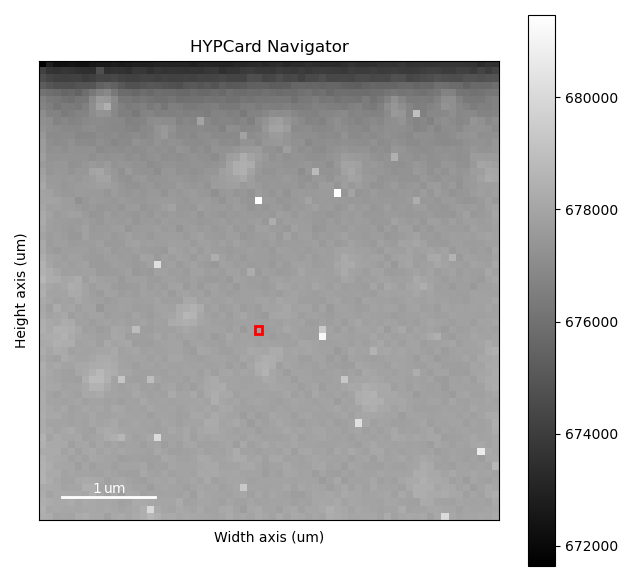

<IPython.core.display.Javascript object>


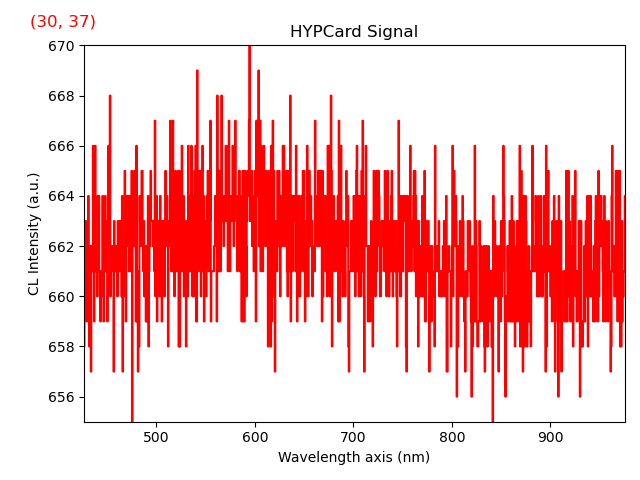

In [3]:
# plot the resulting signal
cl.plot()

## Metadata

The `.sur` file contains the general Hyperspy-specific metadata (`cl.metadata`).
A more detailed metadata is also available via `cl.original_metadata`:

In [4]:
# examine the signal's metadata
cl.metadata

├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.sur
│   │       ├── operation = load
│   │       └── timestamp = 2022-07-25T12:31:21.850384-06:00
│   ├── authors = 
│   ├── date = 
│   ├── original_filename = HYPCard.sur
│   ├── time = 
│   └── title = 
└── Signal
    ├── quantity = CL Intensity (a.u.)
    └── signal_type = CL_SEM

In [5]:
# examine the metadata extracted from the commercial vendor's format
cl.original_metadata.Object_0_Channel_0.Parsed

├── CCD
│   ├── Baseline Clamp = Off
│   ├── Camera Model = A.920
│   ├── Capture Depth = 1024
│   ├── Exposure Time = 0.3
│   ├── Exposure Time_units = s
│   ├── Horizontal Binning = 1
│   ├── Pixel Width = 0.026
│   ├── Pixel Width_units = mm
│   ├── ReadMode = FVB
│   ├── Readout Rate (horizontal pixel shift) = 1Mhz
│   ├── Signal Amplification = x1
│   ├── Speed (vertical pixel shift) = 3.3
│   ├── Temperature = -69
│   ├── Temperature_units = °C
│   └── Voltage Amplitude (vertical pixel shift) = normal
├── CHANNELS
│   ├── Channel1 = SE
│   └── Channel2 = CCD
├── SCAN
│   ├── HYP Dwelltime = 300.000012
│   ├── HYP Dwelltime_units = ms
│   ├── Mode = HYP
│   ├── Reference_Size_X = 512
│   ├── Reference_Size_Y = 512
│   ├── Resolution_X = 64
│   ├── Resolution_X_units = pixels
│   ├── Resolution_Y = 64
│   ├── Resolution_Y_units = pixels
│   ├── Rotate = 0.0
│   ├── Rotate_units = deg
│   ├── Size_X = 1024
│   ├── Size_Y = 1024
│   ├── Start_X = 0
│   ├── Start_Y = 0
│   ├── Voltage Calibration Range_X = 9.2
│   ├── Voltage Calibration Range_X_units = V
│   ├── Voltage Calibration Range_Y = 9.2
│   └── Voltage Calibration Range_Y_units = V
├── SEM
│   ├── Aperture = 100
│   ├── Aperture Chamber Pressure = 1.0426e-07
│   ├── Aperture Chamber Pressure_units = Torr
│   ├── Aperture_units = um
│   ├── Astigmatism 1 X = -0.01
│   ├── Astigmatism 1 X_units = V
│   ├── Astigmatism 1 Y = 0.0
│   ├── Astigmatism 1 Y_units = V
│   ├── Astigmatism 2 X = 17.97
│   ├── Astigmatism 2 X_units = V
│   ├── Astigmatism 2 Y = -6.64
│   ├── Astigmatism 2 Y_units = V
│   ├── Attomic ReadedMagnification = 22000.0
│   ├── Attomic zoom = 40
│   ├── Beam Current = 0.0
│   ├── Beam Current_units = uA
│   ├── Beam Energy = 5998.0
│   ├── Beam Energy_units = V
│   ├── Blanker = Off
│   ├── Blanker_units = um
│   ├── Cathode Heating Current = 1.44
│   ├── Cathode Heating Current_units = A
│   ├── Cathode Heating Voltage = 0.8
│   ├── Cathode Heating Voltage_units = V
│   ├── Deflector 1 X = 0.0
│   ├── Deflector 1 X_units = V
│   ├── Deflector 1 Y = 0.0
│   ├── Deflector 1 Y_units = V
│   ├── Deflector 2 X = -0.21
│   ├── Deflector 2 X_units = V
│   ├── Deflector 2 Y = -0.15
│   ├── Deflector 2 Y_units = V
│   ├── Emission Current = 0.0
│   ├── Emission Current_units = uA
│   ├── Emission Status = ON
│   ├── Extractor Voltage = 4749.0
│   ├── Extractor Voltage_units = V
│   ├── Gun Chamber Pressure = 3.8028e-10
│   ├── Gun Chamber Pressure_units = Torr
│   ├── Gun Lens = 1.2
│   ├── Gun Lens_units = A
│   ├── Isolation Valve = Opened
│   ├── Objective Lens = 0.325544
│   ├── Objective Lens_units = A
│   ├── Real Magnification = 26391.201172
│   ├── Scintillator Voltage = 6010.0
│   ├── Scintillator Voltage_units = V
│   ├── Suppressor Bias = 1004.0
│   └── Suppressor Bias_units = V
├── SITE IMAGE
│   ├── Dwell Time = 300000.011921
│   ├── Dwell Time_units = us
│   ├── Field of view = 0.005
│   ├── Field of view_units = um
│   ├── Number of pixels (x axis) = 64
│   ├── Number of pixels (x axis)_units = px
│   ├── Number of pixels (y axis) = 64
│   ├── Number of pixels (y axis)_units = px
│   ├── stage_model = 10010
│   ├── stage_position_x = -4.600102
│   ├── stage_position_y = -0.743008
│   ├── stage_position_z = -1.368159
│   ├── stage_rotation_x = -0.0
│   ├── stage_rotation_y = -0.0
│   └── stage_rotation_z = -0.0
├── SPECTROMETER
│   ├── Central wavelength = 700.01
│   ├── Central wavelength_units = nm
│   ├── Entrance slit width = 7000
│   ├── Entrance slit width_units = um
│   ├── Exit mirror position = lateral
│   ├── Exit slit width = 0
│   ├── Exit slit width_units = um
│   ├── Exit spectral resolution = 0
│   ├── Exit spectral resolution_units = nm
│   ├── Filter = None
│   ├── Grating = 150/500
│   ├── Grating - Blaze Angle = 0
│   ├── Grating - Groove Density = 150
│   ├── Grating - Groove Density_units = gr/mm
│   ├── Turret = IHR
│   ├── Turret id = 0
│   └── Turret_units = 320
└── WAFER
    ├── Center Position X = 0.0
    ├── Center Posi

## Data pre-processing

Let's start some pre-processing methods:

### Background removal

In the AttoLight system, if a background is taken before mapping, the background is stored automatically in the signal folder.

Otherwise, manually load a background file, using `np.loadtxt(path_to_file)`.

In [7]:
# try to use a saved background file
try:
    bkg_path = os.path.join(root_folder, '*.txt')
    bkg_path = glob.glob(bkg_path)[0]
except IndexError:
    print('Please, specify a `background.txt` file path below:')
    bkg_path = ''

In [8]:
# load background into numpy array using loadtxt
import numpy as np
cl_bkg = np.loadtxt(bkg_path)[1]
print(cl_bkg.shape)

# Run background subtraction
cl = cl - cl_bkg

(1024,)


### Correction of acquisition defects

Correct for the intrinsic shift caused by the misalignment of the grating with the spectrometer aperture centre.

In [9]:
# set calibration_factor and grating
calibration_factor = 131072
grating = int(cl.original_metadata.Object_0_Channel_0.Parsed.SPECTROMETER.Grating__Groove_Density)

if grating == 150:
    correction_factor_grating = 2.73E-04 # 150 gr/mm grating
elif grating == 600:
    correction_factor_grating = 6.693659836087227e-05 # 600 gr/mm grating
else:
    raise ImportError('Grating correction not available')

fov = cl.original_metadata.Object_0_Channel_0.Parsed.SITE_IMAGE.Field_of_view *1e6

grating_calibrations = {
    'cal_factor' : calibration_factor,
    'corr_factor_grating' : correction_factor_grating,
    'field_of_view_um' : fov,
}

In [10]:
# correct grating shift
cl.correct_grating_shift(*grating_calibrations.values())

[########################################] | 100% Completed |  0.4s


The edges of the scan get higher intensities, so they can be cropped. 
If you set the `inplace` parameter to `True` the original CLSEMSpectrum object will be modified, if `False` a cropped copy of it will be created.

In [11]:
# crop the edges of the signal
cl = cl.crop_edges(crop_px=5)

Remove the cosmic ray saturated pixels (pixels with sharp spikes):

In [12]:
# remove cosmic ray spikes
cl.remove_spikes(inplace=True)

/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/lumispy/signals/cl_spectrum.py:112: UserWarning: Threshold value: 19.00
  warn(


If not all spikes are removed, you can use the GUI to manually select pixels by calling `cl.remove_spikes(interactive=True, inplace=True)`

## Plotting data

Plot the corrected data:

<IPython.core.display.Javascript object>


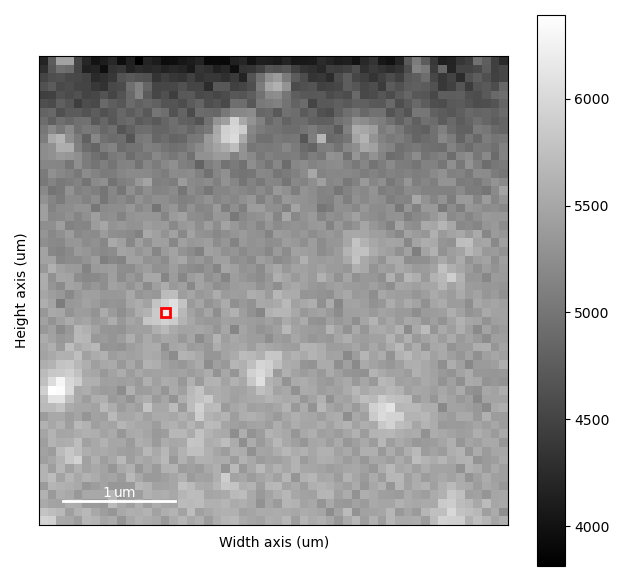

<IPython.core.display.Javascript object>


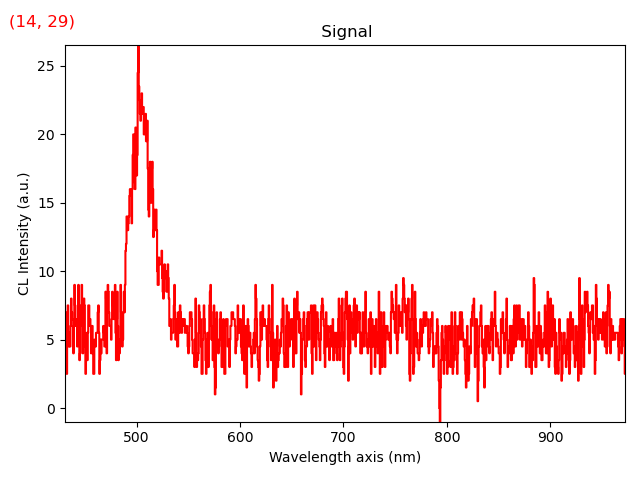

<IPython.core.display.Javascript object>


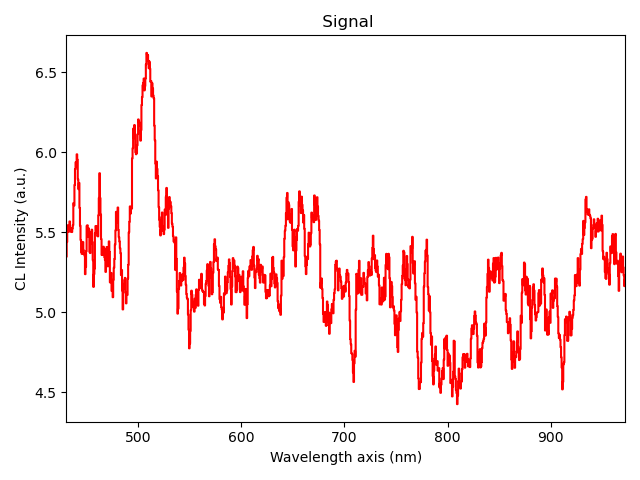

In [13]:
# plot the corrected data and its mean
cl.plot()
cl.mean().plot()

## Save the data as `.hspy` format

Look out for other `lumispy-demos` notebooks to find examples on how to analyse and fit luminescence data.
All notebooks start with a `.hspy` file format.

In [ ]:
# cl.save('path_to_save.hspy')